In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import pickle
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# reading the datasets containing the features
x = pd.read_csv("../datasets/x.csv")
x_train = pd.read_csv("../datasets/x_train.csv")
x_test = pd.read_csv("../datasets/x_test.csv")

In [4]:
x.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,80114.288249,143597.026531,20938.455295
1,1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,141.215034,312548.734113,20938.455295
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,80114.288249,90075.670572,0.025365
3,3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,80114.288249,6006.811369,20938.455295
4,4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,80114.288249,6006.811369,20938.455295


In [5]:
x_train.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,103864,0,43,182,0,0,0,0,0,0,0,0,0,0,0,0,0,101,181,0.00,0.0,1.00,0.00,0.01,255,255,0.00,0.00,0.00,141.215034,130.256663,20938.455295
1,64100,0,28,0,0,3,0,0,0,0,0,0,0,0,0,0,0,73,73,0.00,0.0,1.00,0.00,0.00,255,73,0.64,0.29,0.00,141.215034,90075.670572,20938.455295
2,121047,0,311,1014,0,0,0,0,0,1,0,0,0,0,0,0,0,15,27,0.00,0.0,1.00,0.00,0.15,32,255,0.00,0.03,0.05,80114.288249,6006.811369,20938.455295
3,10100,0,3775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,1,0.05,0.0,0.05,0.75,0.00,255,1,0.07,0.45,0.00,80114.288249,312548.734113,20938.455295
4,69891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,20,1.00,0.0,0.09,0.07,0.00,255,20,0.08,0.00,0.00,80114.288249,0.104730,0.025365


In [6]:
x_test.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,43367,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,212,206,0.01,0.01,0.00,141.215034,90075.670572,20938.455295
1,106111,0,723,328,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,120,138,0.02,0.01,0.02,80114.288249,32667.764255,20938.455295
2,117860,0,339,1497,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,0.0,0.0,1.0,0.0,0.00,51,247,0.00,0.02,0.13,80114.288249,6006.811369,20938.455295
3,8857,0,293,807,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.0,0.0,1.0,0.0,0.00,227,255,0.00,0.00,0.01,80114.288249,6006.811369,20938.455295
4,31875,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,13,19,0.0,0.0,1.0,0.0,0.16,255,254,0.01,0.00,0.00,141.215034,130.256663,20938.455295


In [7]:
# reading the datasets containing the labels
y = pd.read_csv("../datasets/y.csv")
y_train = pd.read_csv("../datasets/y_train.csv")
y_test = pd.read_csv("../datasets/y_test.csv")

In [8]:
y.head()

,Unnamed: 0,attackhlc
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [9]:
y_train.head()

,Unnamed: 0,attackhlc
0,103864,0
1,64100,1
2,121047,0
3,10100,0
4,69891,1


In [10]:
y_test.head()

,Unnamed: 0,attackhlc
0,43367,0
1,106111,0
2,117860,0
3,8857,0
4,31875,0


In [11]:
# dropping the "Unnamed: 0" column from x_train, x_val, x_test, y_train, y_val and y_test
x.drop(columns = ["Unnamed: 0"], inplace = True)
x_train.drop(columns = ["Unnamed: 0"], inplace = True)
x_test.drop(columns = ["Unnamed: 0"], inplace = True)
y.drop(columns = ["Unnamed: 0"], inplace = True)
y_train.drop(columns = ["Unnamed: 0"], inplace = True)
y_test.drop(columns = ["Unnamed: 0"], inplace = True)

In [12]:
x.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,80114.288249,143597.026531,20938.455295
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,141.215034,312548.734113,20938.455295
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,80114.288249,90075.670572,0.025365
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,80114.288249,6006.811369,20938.455295
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,80114.288249,6006.811369,20938.455295


In [13]:
x_train.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,43,182,0,0,0,0,0,0,0,0,0,0,0,0,0,101,181,0.00,0.0,1.00,0.00,0.01,255,255,0.00,0.00,0.00,141.215034,130.256663,20938.455295
1,0,28,0,0,3,0,0,0,0,0,0,0,0,0,0,0,73,73,0.00,0.0,1.00,0.00,0.00,255,73,0.64,0.29,0.00,141.215034,90075.670572,20938.455295
2,0,311,1014,0,0,0,0,0,1,0,0,0,0,0,0,0,15,27,0.00,0.0,1.00,0.00,0.15,32,255,0.00,0.03,0.05,80114.288249,6006.811369,20938.455295
3,0,3775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,1,0.05,0.0,0.05,0.75,0.00,255,1,0.07,0.45,0.00,80114.288249,312548.734113,20938.455295
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,20,1.00,0.0,0.09,0.07,0.00,255,20,0.08,0.00,0.00,80114.288249,0.104730,0.025365


In [14]:
x_test.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,212,206,0.01,0.01,0.00,141.215034,90075.670572,20938.455295
1,0,723,328,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,120,138,0.02,0.01,0.02,80114.288249,32667.764255,20938.455295
2,0,339,1497,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,0.0,0.0,1.0,0.0,0.00,51,247,0.00,0.02,0.13,80114.288249,6006.811369,20938.455295
3,0,293,807,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.0,0.0,1.0,0.0,0.00,227,255,0.00,0.00,0.01,80114.288249,6006.811369,20938.455295
4,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,13,19,0.0,0.0,1.0,0.0,0.16,255,254,0.01,0.00,0.00,141.215034,130.256663,20938.455295


In [15]:
y.head()

,attackhlc
0,0
1,0
2,1
3,0
4,0


In [16]:
y_train.head()

,attackhlc
0,0
1,1
2,0
3,0
4,1


In [17]:
y_test.head()

,attackhlc
0,0
1,0
2,0
3,0
4,0


In [18]:
# scaling only the training and testing datasets using StandardScaler for now
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# gradient boosting classifier

In [20]:
# model training
gbdt_classifier = GradientBoostingClassifier(loss = "log_loss", max_depth = 5, random_state = 96)
gbdt_classifier.fit(x_train_scaled, y_train)

GradientBoostingClassifier(max_depth=5, random_state=96)

In [21]:
# saving the trained model using pickle
with open("../artifacts/gbdt_classifier.pkl", "wb") as f:
    pickle.dump(gbdt_classifier, f)

In [22]:
# predicting using the training data
y_train_pred_gbdt_classifier = gbdt_classifier.predict(x_train_scaled)

# predicting using the testing data
y_test_pred_gbdt_classifier = gbdt_classifier.predict(x_test_scaled)

In [23]:
# accuracy score of prediction using the training data
train_accuracy_gbdt_classifier = accuracy_score(y_test, y_test_pred_gbdt_classifier)
train_accuracy_gbdt_classifier

0.9973537973008733

In [24]:
# accuracy score of prediction using the testing data
test_accuracy_gbdt_classifier = accuracy_score(y_test, y_test_pred_gbdt_classifier)
test_accuracy_gbdt_classifier

0.9973537973008733

In [25]:
# confusion matrix
cm_gbdt_classifier = confusion_matrix(y_test, y_test_pred_gbdt_classifier)
cm_gbdt_classifier

array([[20221,     6,     1,    17,    14],
       [    8, 13716,     0,     0,     0],
       [   15,     0,   281,     0,     6],
       [   23,     1,     0,  3465,     2],
       [    7,     0,     0,     0,     7]])

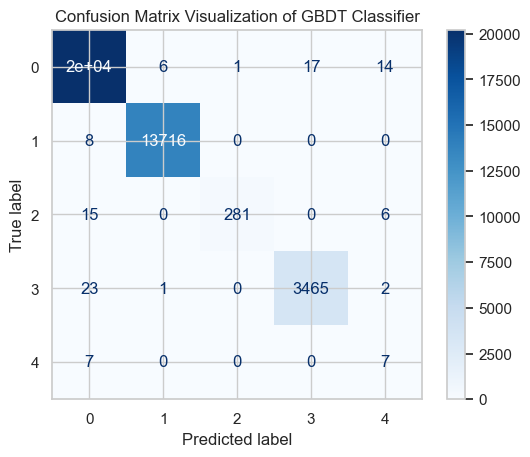

In [26]:
# visualizing the confusion matrix
disp_cm_gbdt_classifier = ConfusionMatrixDisplay(cm_gbdt_classifier)
disp_cm_gbdt_classifier.plot(cmap = "Blues")
plt.title("Confusion Matrix Visualization of GBDT Classifier")
plt.savefig("../artifacts/cm_gbdt_classifier.png")
plt.show()

In [27]:
# precision score
precision_score_gbdt_classifier = precision_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
precision_score_gbdt_classifier

0.9976529015820879

In [28]:
# recall score
recall_score_gbdt_classifier = recall_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
recall_score_gbdt_classifier

0.9973537973008733

In [29]:
# f1 score
f1_score_gbdt_classifier = f1_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
f1_score_gbdt_classifier

0.9974773813758047

In [30]:
# classification report
classification_report_gbdt_classifier = classification_report(y_test, y_test_pred_gbdt_classifier)
print(classification_report_gbdt_classifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20259
           1       1.00      1.00      1.00     13724
           2       1.00      0.93      0.96       302
           3       1.00      0.99      0.99      3491
           4       0.24      0.50      0.33        14

    accuracy                           1.00     37790
   macro avg       0.85      0.88      0.86     37790
weighted avg       1.00      1.00      1.00     37790



In [31]:
x_train.columns

Index(['duration', 'srcbytes', 'dstbytes', 'land', 'wrongfragment', 'urgent',
       'hot', 'numfailedlogins', 'loggedin', 'numcompromised', 'rootshell',
       'suattempted', 'numfilecreations', 'numshells', 'numaccessfiles',
       'ishostlogin', 'count', 'srvcount', 'serrorrate', 'rerrorrate',
       'samesrvrate', 'diffsrvrate', 'srvdiffhostrate', 'dsthostcount',
       'dsthostsrvcount', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'protocol_encoded', 'service_encoded',
       'flag_encoded'],
      dtype='object')